In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
info_job_level_dfs = {}
spatial_job_level_dfs = {}
info_job_level_dfs["gpu_utilization"] = pd.read_csv("job_level_gpu_utilization.csv")
spatial_job_level_dfs["gpu_utilization"] = pd.read_csv("spatial_job_level_gpu_utilization.csv") 

In [3]:
gputil_all = info_job_level_dfs["gpu_utilization"]
gputil_30 = gputil_all[gputil_all['mean_utilization'] <= 30]
gputil_30_70 = gputil_all[(gputil_all['mean_utilization'] > 30) & (gputil_all['mean_utilization'] < 70)]
gputil_70 = gputil_all[(gputil_all['mean_utilization'] >= 70) & (gputil_all['mean_utilization'] <= 100)] 

In [4]:
gputil_spatial_30 = pd.merge(gputil_30, spatial_job_level_dfs["gpu_utilization"][['jobid', 'spatial_imbalance_gpu_utilization']], on='jobid', how='left').dropna()
gputil_spatial_30_70 = pd.merge(gputil_30_70, spatial_job_level_dfs["gpu_utilization"][['jobid', 'spatial_imbalance_gpu_utilization']], on='jobid', how='left').dropna()
gputil_spatial_70 = pd.merge(gputil_70, spatial_job_level_dfs["gpu_utilization"][['jobid', 'spatial_imbalance_gpu_utilization']], on='jobid', how='left').dropna()

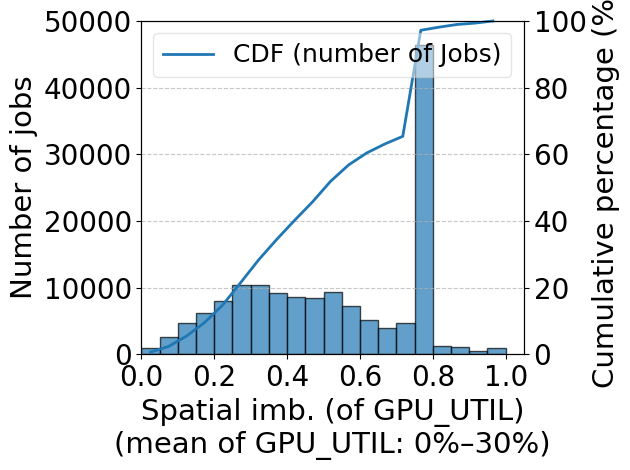

In [5]:
hist_values, bin_edges = np.histogram(gputil_spatial_30['spatial_imbalance_gpu_utilization'], bins=20, density=False)
cumulative_hist = np.cumsum(hist_values)
cdf = cumulative_hist / cumulative_hist[-1] * 100  

fig, ax1 = plt.subplots()
ax1.hist(gputil_spatial_30[f"spatial_imbalance_gpu_utilization"], bins=20, range=(0,1), edgecolor='black', alpha=0.7)
ax1.set_ylabel('Number of jobs', fontsize=21)
ax1.set_xlim(0)
ax1.set_ylim(0, 50000)
ax1.set_xlabel("Spatial imb. (of GPU_UTIL)\n(mean of GPU_UTIL: 0%–30%)", fontsize=21)
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

ax2 = ax1.twinx()
ax2.plot((bin_edges[:-1] + bin_edges[1:]) / 2, cdf, label='CDF (number of Jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)
ax2.set_ylim(0, 100)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
plt.legend(loc="best", fontsize=18, framealpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

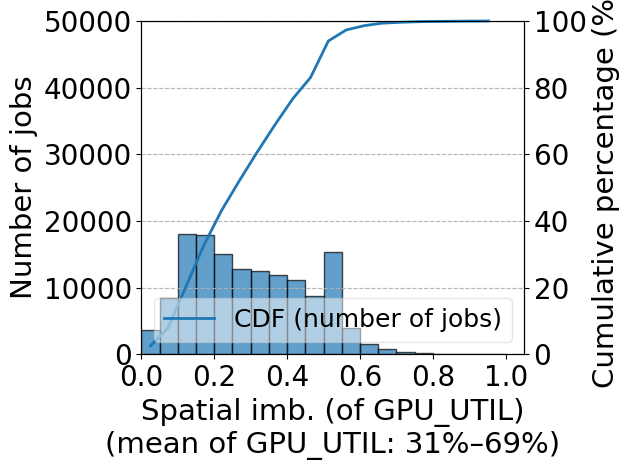

In [6]:
hist_values, bin_edges = np.histogram(gputil_spatial_30_70['spatial_imbalance_gpu_utilization'], bins=20, density=False)
cumulative_hist = np.cumsum(hist_values)
cdf = cumulative_hist / cumulative_hist[-1] * 100 

fig, ax1 = plt.subplots()
ax1.hist(gputil_spatial_30_70[f"spatial_imbalance_gpu_utilization"], bins=20, range=(0,1), edgecolor='black', alpha=0.7)
ax1.set_ylabel('Number of jobs', fontsize=21)
ax1.set_xlim(0)
ax1.set_xlabel("Spatial imb. (of GPU_UTIL)\n(mean of GPU_UTIL: 31%–69%)", fontsize=21)
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.set_ylim(0, 50000)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot((bin_edges[:-1] + bin_edges[1:]) / 2, cdf, label='CDF (number of jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)

ax2.tick_params(axis='y')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_ylim(0, 100)
plt.legend(loc="best", fontsize=18, framealpha=0.5)

plt.tight_layout()
plt.show()
plt.close()

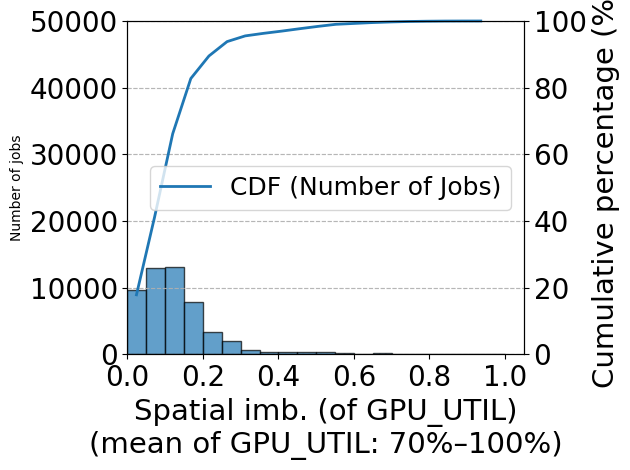

In [7]:
hist_values, bin_edges = np.histogram(gputil_spatial_70['spatial_imbalance_gpu_utilization'], bins=20, density=False)
cumulative_hist = np.cumsum(hist_values)
cdf = cumulative_hist / cumulative_hist[-1] * 100 

fig, ax1 = plt.subplots()
ax1.hist(gputil_spatial_70[f"spatial_imbalance_gpu_utilization"], bins=20, range=(0,1), edgecolor='black', alpha=0.7)
ax1.set_ylabel('Number of jobs')
ax1.set_xlim(0)
ax1.set_xlabel("Spatial imb. (of GPU_UTIL)\n(mean of GPU_UTIL: 70%–100%)", fontsize=21)
ax1.set_yticks([0, 10000, 20000, 30000, 40000, 50000])
ax1.set_ylim(0, 50000)
ax1.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot((bin_edges[:-1] + bin_edges[1:]) / 2, cdf, label='CDF (Number of Jobs)', linewidth=2, clip_on=False)
ax2.set_ylabel('Cumulative percentage (%)', fontsize=21)

ax2.tick_params(axis='y')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_ylim(0, 100)
plt.legend(loc="center right", fontsize=18)

plt.tight_layout()
plt.show()
plt.close()